<a href="https://colab.research.google.com/github/ander002/DeepLearning/blob/main/DeepLearning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#现代卷积神经网络
> * AlexNet。它是第⼀个在⼤规模视觉竞赛中击败传统计算机视觉模型的⼤型神经⽹络；
* 使⽤重复块的⽹络（VGG）。它利⽤许多重复的神经⽹络块；
* ⽹络中的⽹络（NiN）。它重复使⽤由卷积层和1 × 1 卷积层（⽤来代替全连接层）来构建深层⽹络;
* 含并⾏连结的⽹络（GoogLeNet）。它使⽤并⾏连结的⽹络，通过不同窗口⼤小的卷积层和最⼤汇聚层来并⾏抽取信息；
* 残差⽹络（ResNet）。它通过残差块构建跨层的数据通道，是计算机视觉中最流⾏的体系结构；
* 稠密连接⽹络（DenseNet）。它的计算成本很⾼，但给我们带来了更好的效果。

## AlexNet
> ⾸次证明了学习到的特征可以超越⼿⼯设计的特征,AlexNet和LeNet的架构⾮常相似,这里给出他们的对比图，左为LeNet:

![AlexNet](http://pan.anderd.com/download/6152e8da7015ee003ff4fce3)


### 模型设计
&emsp;&emsp;在AlexNet的第⼀层，卷积窗口的形状是 11×11。由于ImageNet中⼤多数图像的宽和⾼⽐MNIST图像的多10倍以上，因此，需要⼀个更⼤的卷积窗口来捕获⽬标。第⼆层中的卷积窗口形状被缩减为 5×5，然后是 3×3。此外，在第⼀层、第⼆层和第五层卷积层之后，加⼊窗口形状为 3×3、步幅为2的最⼤汇聚层。而且，AlexNet的卷积通道数⽬是LeNet的10倍。在最后⼀个卷积层后有两个全连接层，分别有4096个输出。

### 激活函数
&emsp;&emsp;AlexNet将sigmoid激活函数改为更简单的ReLU激活函数。⼀⽅⾯，ReLU激活函数的计算更简单，它不需要如sigmoid激活函数那般复杂的求幂运算。另⼀⽅⾯，当使⽤不同的参数初始化⽅法时，ReLU激活函数使训练模型更加容易。当sigmoid激活函数的输出⾮常接近于0或1时，这些区域的梯度⼏乎为0，因此反向传播**⽆法继续更新⼀些模型参数**。相反，ReLU激活函数在正区间的梯度总是1。因此，**如果模型参数没有正确初始化，sigmoid函数可能在正区间内得到⼏乎为0的梯度，从而使模型⽆法得到有效的训练**。

### 容量处理和预处理
&emsp;&emsp;AlexNet通过dropout控制全连接层的模型复杂度，而LeNet只使⽤了权重衰减。为了进⼀步扩充数据，AlexNet在训练时增加了⼤量的图像增强数据，如翻转、裁切和变⾊。这使得模型更健壮，更⼤的样本量有效地减少了过拟合。

### AlexNet和LeNet的复杂度对比

![复杂度](http://pan.anderd.com/download/6152f843064718003f35d225)


In [1]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.2 MB/s 


In [ ]:
#实现
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    #这里我们用11*11的窗口来捕捉对象，步幅为4，以减少输出的高度和宽度。输出通道也比LeNet变大了好多。
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(),
    #改用最大池化层
    nn.MaxPool2d(kernel_size=3,stride=2),
    #减少卷积窗口，使用填充为2，来使得输入和输出的高和宽一致。让后增大输出通道
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    #使用三个连续的卷积层和较小的卷积窗口，除了最后的卷积层，输出通道的数量进一步增加。
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Flatten(),
    #这里，全连接层的输出数量是LeNet中的好几倍，使用dropout层来减轻过度拟合
    nn.Linear(6400,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    #输出层，由于我们用Fashion-MNIST，所以类别数为10。
    nn.Linear(4096,10))

In [ ]:
#构造一个高度和宽度都为224的单通道数据，来观察每一层输出的形状
X = torch.randn(1,1,224,224)
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__,'OutPut shape: \t',X.shape)

Conv2d OutPut shape: 	 torch.Size([1, 96, 54, 54])
ReLU OutPut shape: 	 torch.Size([1, 96, 54, 54])
MaxPool2d OutPut shape: 	 torch.Size([1, 96, 26, 26])
Conv2d OutPut shape: 	 torch.Size([1, 256, 26, 26])
ReLU OutPut shape: 	 torch.Size([1, 256, 26, 26])
MaxPool2d OutPut shape: 	 torch.Size([1, 256, 12, 12])
Conv2d OutPut shape: 	 torch.Size([1, 384, 12, 12])
ReLU OutPut shape: 	 torch.Size([1, 384, 12, 12])
Conv2d OutPut shape: 	 torch.Size([1, 384, 12, 12])
ReLU OutPut shape: 	 torch.Size([1, 384, 12, 12])
Conv2d OutPut shape: 	 torch.Size([1, 256, 12, 12])
ReLU OutPut shape: 	 torch.Size([1, 256, 12, 12])
MaxPool2d OutPut shape: 	 torch.Size([1, 256, 5, 5])
Flatten OutPut shape: 	 torch.Size([1, 6400])
Linear OutPut shape: 	 torch.Size([1, 4096])
ReLU OutPut shape: 	 torch.Size([1, 4096])
Dropout OutPut shape: 	 torch.Size([1, 4096])
Linear OutPut shape: 	 torch.Size([1, 4096])
ReLU OutPut shape: 	 torch.Size([1, 4096])
Dropout OutPut shape: 	 torch.Size([1, 4096])
Linear OutPut sh

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
#获取数据集，还是用Fashion-MNIST数据集，但有一个问题是图像分辨率，这里我们用resize参数来调整。使之适合AlexNet。
batch_size = 128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

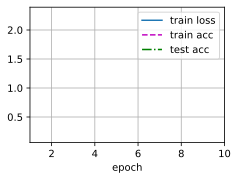

In [ ]:
lr,num_epochs = 0.01, 10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

## VGG（使用块的网络）
&emsp;&emsp;经典卷积神经⽹络的基本组成部分是下⾯的这个序列：
* 带填充以保持分辨率的卷积层；
* ⾮线性激活函数，如ReLU；
* 汇聚层，如最⼤汇聚层。

&emsp;&emsp;而⼀个 VGG 块与之类似，由⼀系列卷积层组成，后⾯再加上⽤于空间下采样的最⼤汇聚层。





In [ ]:
#VGG块，函数有三个参数，分别对应于卷积层的数量 num_convs、
#输⼊通道的数量 in_channels 和输出通道的数量 out_channels
import torch
from torch import nn
from d2l import torch as d2l

def vgg_block(num_convs,in_channels,out_channels):
  layers = []
  for _ in range(num_convs):
    layers.append(nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1))
    layers.append(nn.ReLU())
    in_channels = out_channels
  layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
  return nn.Sequential(*layers)

### VGG网络
&emsp;&emsp;与 AlexNet、LeNet ⼀样，VGG ⽹络可以分为两部分：第⼀部分主要由卷积层和汇聚层(多个VGG块)组成，第⼆部分由全连接层组成。如图所示。

![VGG](http://pan.anderd.com/download/6153bdf117cc83003f5e3387)

&emsp;&emsp;原始VGG⽹络有5个卷积块，其中前两个块各有⼀个卷积层，后三个块各包含两个卷积层。第⼀个模块有64个输出通道，每个后续模块将输出通道数量翻倍，直到该数字达到512。由于该⽹络使⽤8个卷积层和3个全连接层，因此它通常被称为VGG-11。

In [ ]:
#实现VGG-11,通过在conv_arch上执行for循环来实现

conv_arch = ((1,64,),(1,128),(2,256),(2,512),(2,512))

def vgg(conv_arch):
  conv_blks = []
  in_channels = 1
  #卷积层部分
  for (num_convs,out_channels) in conv_arch:
    conv_blks.append(vgg_block(num_convs,in_channels,out_channels))
    in_channels = out_channels

  return nn.Sequential(
      *conv_blks,nn.Flatten(),
      #全连接层
      nn.Linear(out_channels * 7 * 7,4096),nn.ReLU(),nn.Dropout(0.5),
      nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(0.5),
      nn.Linear(4096,10))

net = vgg(conv_arch)

In [ ]:
#构建一个高宽为224的单通道数据样本，来观察每层的输出形状
X = torch.randn((1,1,224,224))
for blk in net:
  X = blk(X)
  print(blk.__class__.__name__,'output shape:\t',X.shape)
#结果看出，每个块的高度的宽度减半，最终都是7，最后在展平表示，送入全连接层处理。

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [ ]:
#训练模型，仍然用Fashin-MNIST
ratio = 4
small_conv_arch = [(pair[0],pair[1] // ratio)for pair in conv_arch]
net = vgg(small_conv_arch)

loss 0.172, train acc 0.936, test acc 0.922
379.7 examples/sec on cuda:0


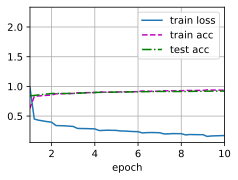

In [ ]:
lr, num_epochs,batch_size = 0.05,10,128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

## NIN(网络中的网络)
&emsp;&emsp;LeNet、AlexNet和VGG都有⼀个共同的设计模式：
* 通过⼀系列的卷积层与汇聚层来提取空间结构特征；
* 然后通过全连接层对特征的表征进⾏处理。

&emsp;&emsp;AlexNet和VGG对LeNet的改进主要在于如何扩⼤和加深这两个模块。**⽹络中的⽹络(NiN)**提供了⼀个⾮常简单的解决⽅案：在每个像素的通道上分别使⽤多层感知机。
### NIN块
&emsp;&emsp;卷积层的输⼊和输出由四维张量组成，张量的每个轴分别对应样本、通道、⾼度和宽度。另外，全连接层的输⼊和输出通常是分别对应于样本和特征的⼆维张量。NiN的想法是在**每个像素位置**（针对每个⾼度和宽度）应⽤⼀个全连接层。
如果我们将权重连接到每个空间位置，我们可以将其视为**1×1卷积层**，或作为在每个像素位置上独⽴作⽤的全连接层。从另⼀个⻆度看，即将空间维度中的每个像素视为单个样本，将通道维度视为不同特征（feature）。下图是VGG和NIN的差异。

![NIN](http://pan.anderd.com/download/6153d6c3ea9096003f591ae0)

> &emsp;&emsp;NiN块以⼀个普通卷积层开始，后⾯是两个1×1的卷积层。这两个1×1卷积层充当带有ReLU激活函数的逐像素全连接层。第⼀层的卷积窗口形状通常由⽤户设置。随后的卷积窗口形状固定为1×1。



In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

def nin_block(in_channels,out_channels,kernel_size,strides,padding):#一个卷积层两个1x1的卷积层代替全链接层
  return nn.Sequential(
      nn.Conv2d(in_channels,out_channels,kernel_size,strides,padding),
      nn.ReLU(),
      nn.Conv2d(out_channels,out_channels,kernel_size=1,),nn.ReLU(),#默认padding=0，stride=1
      nn.Conv2d(out_channels,out_channels,kernel_size=1,),nn.ReLU())

In [ ]:
#NiN模型
net = nn.Sequential(
    nin_block(1,96,kernel_size=11,strides=4,padding=0),
    nn.MaxPool2d(3,stride=2),
    nin_block(96,256,kernel_size=5,strides=1,padding=2),
    nn.MaxPool2d(3,stride=2),
    nin_block(256,384,kernel_size=3,strides=1,padding=1),
    nn.MaxPool2d(3,stride=2),
    nn.Dropout(0.5),
    nin_block(384,10,kernel_size=3,strides=1,padding=1),
    nn.AdaptiveAvgPool2d((1,1)),#高宽都为1，全局平均汇聚层（global average pooling layer），⽣成⼀个多元逻辑向量（logits）？？？？降低模型复杂性
    # 将四维的输出转成⼆维的输出，其形状为(批量⼤⼩, 10)
    nn.Flatten())

In [ ]:
#创建⼀个数据样本来查看每个块的输出形状。
X = torch.rand(size=(1,1,224,224))
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__, 'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


loss 0.591, train acc 0.800, test acc 0.805
452.4 examples/sec on cuda:0


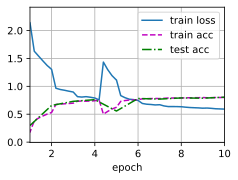

In [ ]:
lr,num_epochs,batch_size = 0.1,10,128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

###小结
* NiN使⽤由⼀个卷积层和多个 1 × 1 卷积层组成的块。该块可以在卷积神经⽹络中使⽤，以允许更多的
每像素⾮线性。
* NiN去除了容易造成过拟合的全连接层，将它们替换为全局平均汇聚层（即在所有位置上进⾏求和）。该汇聚层通道数量为所需的输出数量（例如，Fashion-MNIST的输出为10）。
* 移除全连接层可减少过拟合，同时显著减少NiN的参数。
* NiN的设计影响了许多后续卷积神经⽹络的设计。


## GoogleNet（含并行连结的网络）

&emsp;&emsp;GoogLeNet吸收了NiN中串联⽹络的思想，并在此基础上做了改进。这篇论⽂的⼀个重点是解决了什么样⼤小的卷积核最合适的问题。毕竟，以前流⾏的⽹络使⽤小到1×1，⼤到11×11的卷积核。本⽂的⼀个观点是，有时使⽤不同⼤小的卷积核组合是有利的。
### Inception块
&emsp;&emsp;在GoogLeNet中，基本的卷积块被称为Inception块（Inception block）。在Inception块中，通常调整的超参数是每层输出通道的数量。
![inception块](http://pan.anderd.com/download/6154222f1a2c20003f4951f5)

> 跟单个3x3或5x5卷积层比，Inception块又更少的参数个数和计算复杂度。

![Inception复杂度](http://pan.anderd.com/download/61543d516f30dc003f6af60d)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

class Inception(nn.Module):
  def __init__(self,in_channels,c1,c2,c3,c4,**kwargs):
    super(Inception,self).__init__(**kwargs)
    #线路1，单1x1卷积层
    self.p1_1 = nn.Conv2d(in_channels,c1,kernel_size=1)
    #线路2，1x1卷积层后接3x3卷积层
    self.p2_1 = nn.Conv2d(in_channels,c2[0],kernel_size=1)
    self.p2_2 = nn.Conv2d(c2[0],c2[1],kernel_size=3,padding=1)
    #线路3，1x1卷积层后接5x5卷积层
    self.p3_1 = nn.Conv2d(in_channels,c3[0],kernel_size=1)
    self.p3_2 = nn.Conv2d(c3[0],c3[1],kernel_size=5,padding=2)
    #线路4，3x3最大汇聚层后接1x1卷积层
    self.p4_1 = nn.MaxPool2d(kernel_size=3,stride=1,padding=1)
    self.p4_2 = nn.Conv2d(in_channels,c4,kernel_size=1)
  
  def forward(self,x):
    p1 = F.relu(self.p1_1(x))
    p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
    p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
    p4 = F.relu(self.p4_2(self.p4_1(x)))

    return torch.cat((p1,p2,p3,p4),dim=1)
    
    #经过这个Inception块，输入和输出的高宽不变，通道数增加了。

###GoogleNet模型
&emsp;&emsp;GoogLeNet⼀共使⽤9个Inception块和全局平均汇聚层的堆叠来⽣成其估计值。Inception块之间的最⼤汇聚层可降低维度。第⼀个模块类似于AlexNet和LeNet，Inception块的栈从VGG继承，全局平均汇聚层避免了在最后使⽤全连接层。

![GoogleNet模型](http://pan.anderd.com/download/615425f001017e003fd7391a)

In [ ]:
#模型实现
#第一个模块使用64个通道，7x7卷积层
b1 = nn.Sequential(
    nn.Conv2d(1,64,kernel_size=7,stride=2,padding=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=1))

#第二块使用两个卷积层：第⼀个卷积层是64个通道、1×1卷积层；
#第⼆个卷积层使⽤将通道数量增加三倍的3×3卷积层。这对应于Inception块中的第⼆条路径。

b2 = nn.Sequential(
    nn.Conv2d(64, 64, kernel_size=1),
    nn.ReLU(),
    nn.Conv2d(64, 192, kernel_size=3, padding=1),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

#第三个模块串联两个完整的Inception块。
b3 = nn.Sequential(
    Inception(192, 64, (96, 128), (16, 32), 32),
    Inception(256, 128, (128, 192), (32, 96), 64),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

#第四模块更加复杂，它串联了5个Inception块.
b4 = nn.Sequential(
    Inception(480, 192, (96, 208), (16, 48), 64),
    Inception(512, 160, (112, 224), (24, 64), 64),
    Inception(512, 128, (128, 256), (24, 64), 64),
    Inception(512, 112, (144, 288), (32, 64), 64),
    Inception(528, 256, (160, 320), (32, 128), 128),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

#第五模块包含两个Inception块。
b5 = nn.Sequential(
    Inception(832, 256, (160, 320), (32, 128), 128),
    Inception(832, 384, (192, 384), (48, 128), 128),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten())

net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024,10))

In [ ]:
#各个模块输出的形状变化
X = torch.rand(size=(1,1,96,96))
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__,'output shape:\t',X.shape)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


loss 0.245, train acc 0.906, test acc 0.886
466.5 examples/sec on cuda:0


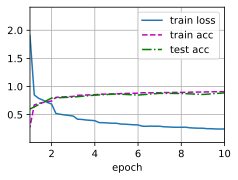

In [ ]:
#训练模型
lr,num_epochs,batch_size = 0.1,10,128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=96)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

###小结
* Inception 块相当于⼀个有4条路径的⼦⽹络。它通过不同窗口形状的卷积层和最⼤汇聚层来并⾏抽取信息，并使⽤1×1卷积层减少每像素级别上的通道维数从而降低模型复杂度。
* GoogLeNet将多个设计精细的Inception块与其他层（卷积层、全连接层）串联起来。其中Inception块的通道数分配之⽐是在ImageNet数据集上通过⼤量的实验得来的。
* GoogLeNet和它的后继者们⼀度是ImageNet上最有效的模型之⼀：它以较低的计算复杂度提供了类似的测试精度。

## 批量归一化
### 批量归一化的原因
&emsp;&emsp;首先，数据预处理的方式通常会对最终结果产⽣巨⼤影响。使⽤真实数据时，我们的第⼀步是标准化输⼊特征，使其平均值为0，⽅差为1。这种标准化可以很好地与我们的优化器配合使⽤，因为它可以将参数的量级进⾏统⼀。

&emsp;&emsp;第⼆，对于典型的多层感知机或卷积神经⽹络。当我们训练时，中间层中的变量（例如，多层感知机中的仿射变换输出）可能具有更⼴的变化范围模型参数的随着训练更新变幻莫测。批量归⼀化的发明者⾮正式地假设，这些变量分布中的**这种偏移可能会阻碍⽹络的收敛**。

&emsp;&emsp;第三，更深层的⽹络很复杂，容易过拟合。这意味着正则化变得更加重要。
### 批量归一化的算法
&emsp;&emsp;在每次训练迭代中，我们⾸先归⼀化输⼊，即通过减去其均值并除以其标准差，其中两者均基于当前小批量处理。接下来，我们应⽤⽐例系数和⽐例偏移。正是由于这个基于批量统计的标准化，才有了批量归⼀化的名称。数学表达式如下：

$BN(x)= \gamma \bigodot \frac{x-\hat{\mu}_B}{\hat{\sigma}_B}+\beta$

>应⽤标准化后，⽣成的小批量的平均值为0和单位⽅差为1。由于单位⽅差（与其他⼀些魔法数）是⼀个任意的选择，因此我们通常包含拉伸参数（scale）γ和偏移参数（shift）β，它们的形状与x相同。请注意，**γ和β是需要与其他模型参数⼀起学习的参数**。

&emsp;&emsp;其中
$\hat{\mu}_B=\frac{1}{|B|}\sum_{x\in B} x$，  &emsp;&emsp;B是一个小批量

&emsp;&emsp;$\hat{\sigma}_B^2=\frac{1}{|B|}\sum_{x\in B}(x-\hat{\mu}_B)^2+\epsilon$，&emsp;&emsp;$\epsilon$是一个小常量>0,以确保我们永远不会除以0

###批量归一化应用放在哪里
* 我们将批量归⼀化层置于全连接层中的仿射变换和激活函数之间。
* 对于卷积层，我们可以在卷积层之后和⾮线性激活函数之前应⽤批量归⼀化。当卷积有多个输出通道时，我们需要对这些通道的“每个”输出执⾏批量归⼀化，每个通道都有⾃⼰的拉伸（scale）和偏移（shift）参数，这两个参数都是标量。
* 批量归⼀化在训练模式和预测模式下的⾏为通常不同。⼀种常⽤的⽅法是通过移动平均估算整个训练数据集的样本均值和⽅差，并在预测时使⽤它们得到确定的输出。



In [6]:
#从0开始实现
import torch
from torch import nn
from d2l import torch as d2l

def batch_norm(X,gamma,beta,moving_mean,moving_var,eps,momentum):
  if not torch.is_grad_enabled():#通过is_grad_enabled来判断当前是训练模式还是预测模式
    X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
  else:
    assert len(X.shape) in (2,4)
    if len(X.shape) == 2:
      mean = X.mean(dim=0)#使用全连接层的情况，计算特征维上的均值和方差
      var = ((X - mean) ** 2).mean(dim=0)
    else:
      mean = X.mean(dim=(0,2,3),keepdim=True)#使⽤⼆维卷积层的情况，计算通道维上（axis=1）的均值和⽅差。
      var = ((X - mean) ** 2).mean(dim=(0,2,3),keepdim=True)
    #训练模式下，⽤当前的均值和⽅差做标准化
    X_hat = (X - mean) / torch.sqrt(var + eps)
    # 更新移动平均的均值和⽅差
    moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
    moving_var = momentum * moving_var + (1.0 - momentum) * var
  Y = gamma * X_hat + beta#缩放和移位
  return Y,moving_mean.data,moving_var.data

In [7]:
#创建一个正确的 BatchNorm 图层，个层将保持适当的参数：拉伸 gamma 和偏移 beta, 这两个参数将在训练过程中更新。
class BatchNorm(nn.Module):
    # `num_features`：完全连接层的输出数量或卷积层的输出通道数。
    # `num_dims`：2表示完全连接层，4表示卷积层
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成1和0
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # 非模型参数的变量初始化为0和1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # 如果 `X` 不在内存上，将 `moving_mean` 和 `moving_var`
        # 复制到 `X` 所在显存上
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # 保存更新过的 `moving_mean` 和 `moving_var`
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y

In [8]:
#使用批量归一化层的LeNet
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), BatchNorm(6, num_dims=4), nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), BatchNorm(16, num_dims=4), nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(16*4*4, 120), BatchNorm(120, num_dims=2), nn.Sigmoid(),
    nn.Linear(120, 84), BatchNorm(84, num_dims=2), nn.Sigmoid(),
    nn.Linear(84, 10))

loss 0.245, train acc 0.911, test acc 0.791
2687.1 examples/sec on cpu


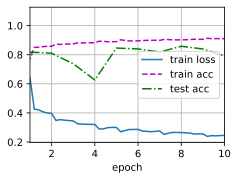

In [9]:
lr, num_epochs, batch_size = 1.0, 10, 256  #与之前相比，主要区别在于学习率大得多。
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [11]:
net[1].gamma.reshape((-1,)).data, net[1].beta.reshape((-1,)).data

(tensor([2.1793, 1.0095, 2.3975, 1.3372, 1.4656, 2.9885]),
 tensor([ 1.5167, -0.9683,  0.0122, -0.8602, -0.2290, -3.3346]))

In [13]:
#简明实现，们也可以直接使用深度学习框架中定义的 BatchNorm 
net = nn.Sequential(
    nn.Conv2d(1,6,kernel_size=5),nn.BatchNorm2d(6),nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2,stride=2),
    nn.Conv2d(6,16,kernel_size=5),nn.BatchNorm2d(16),nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2,stride=2),nn.Flatten(),
    nn.Linear(256,120),nn.BatchNorm1d(120),nn.Sigmoid(),
    nn.Linear(120,84),nn.BatchNorm1d(84),nn.Sigmoid(),
    nn.Linear(84,10))

loss 0.247, train acc 0.910, test acc 0.781
3452.6 examples/sec on cpu


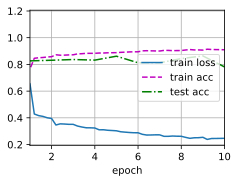

In [14]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

>批量归⼀化已经被证明是⼀种不可或缺的⽅法。它适⽤于⼏乎所有图像分类器，并在学术界获得了数万引⽤。
###小结
* 在模型训练过程中，批量归⼀化利⽤小批量的均值和标准差，不断调整神经⽹络的中间输出，使整个神经⽹络各层的中间输出值更加稳定。
* 批量归⼀化在全连接层和卷积层的使⽤略有不同。
* 批量归⼀化层和 dropout 层⼀样，在训练模式和预测模式下计算不同。
* 批量归⼀化有许多有益的副作⽤，主要是正则化。另⼀⽅⾯，”减少内部协变量偏移“的原始动机似乎不是⼀个有效的解释。